In [1]:
# The usual preamble
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

Populating the interactive namespace from numpy and matplotlib


c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
files=[]
for num in range(1880, 2016):
    key=str(num)
    file=pd.read_csv('Input/yob{0}.txt'.format(key), names=['name', 'sex', 'births'])
    file['year']=num
    files.append(file)

In [3]:
names=pd.concat(files, ignore_index=True)
names[:20]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [4]:
names.count()

name      1858689
sex       1858689
births    1858689
year      1858689
dtype: int64

In [5]:
total_births=names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876
2015,1769325,1898858


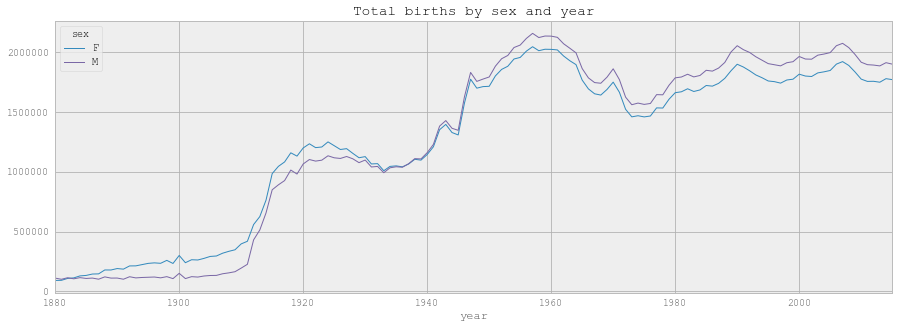

In [6]:
total_births.plot(title='Total births by sex and year')

In [7]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()
    return group

names=names.groupby(['year', 'sex']).apply(add_prop)

In [8]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [9]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000=names.groupby(['year', 'sex']).apply(get_top1000)

In [10]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [11]:
total_births=top1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)
total_births.head()

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,Abrielle,Abril,Ace,Achilles,...,Zelma,Zelpha,Zena,Zenas,Zendaya,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zhane,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,NaN,NaN,NaN,NaN,...,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,NaN,NaN,NaN,NaN,...,17.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,NaN,NaN,8.0,NaN,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12.0,NaN,11.0,NaN,NaN,27.0,52.0,20.0,NaN,NaN,6.0,NaN,...,16.0,NaN,13.0,NaN,NaN,NaN,NaN,6.0,5.0,NaN,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,45.0,14.0,NaN,13.0,NaN,NaN,33.0,67.0,29.0,NaN,NaN,NaN,NaN,...,29.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,6.0,7.0,NaN,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11F84470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11F8BC10>], dtype=object)

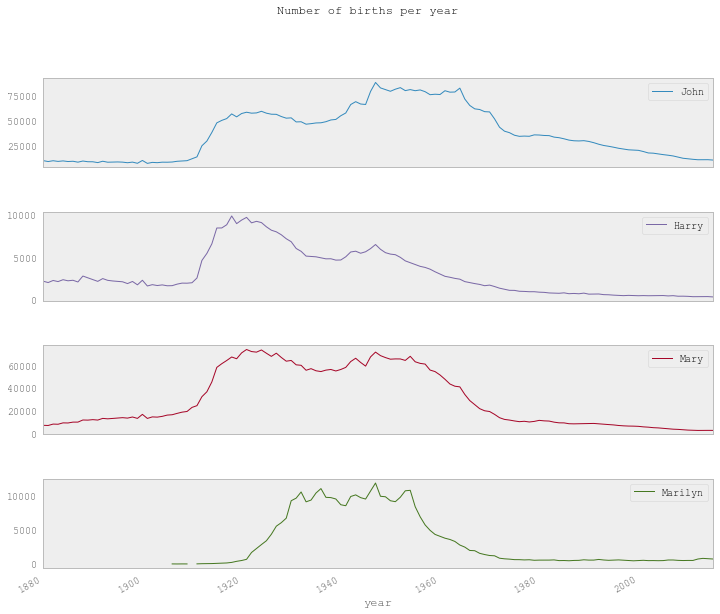

In [12]:
subset=total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


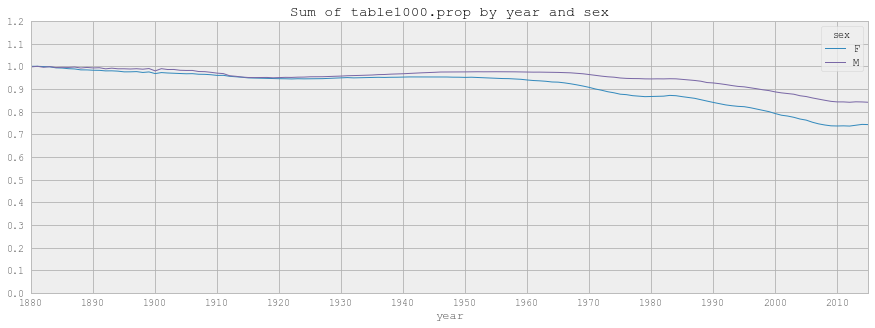

In [13]:
table=top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [14]:
df=boys[boys.year==2010]

In [15]:
prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1677509    0.011540
           1677510    0.020938
           1677511    0.029986
           1677512    0.038947
           1677513    0.047845
           1677514    0.056592
           1677515    0.065177
           1677516    0.073439
           1677517    0.081545
           1677518    0.089628
Name: prop, dtype: float64

In [16]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int32)

In [17]:
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(0.5)

diversity=top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.head()

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


sex,F,M
year,,
1880,[37],[13]
1881,[37],[13]
1882,[37],[14]
1883,[38],[14]
1884,[38],[15]


In [18]:
get_last_letter=lambda x: x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'

In [19]:
table=names.pivot_table(values='births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
subtable=table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                 NaN     694.0     454.0    411.0    3912.0   39229.0
c                 5.0      49.0     954.0    482.0   15463.0   23325.0
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0

In [20]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022121.0
     2010    1773440.0
M    1910     194216.0
     1960    2132756.0
     2010    1914629.0
dtype: float64

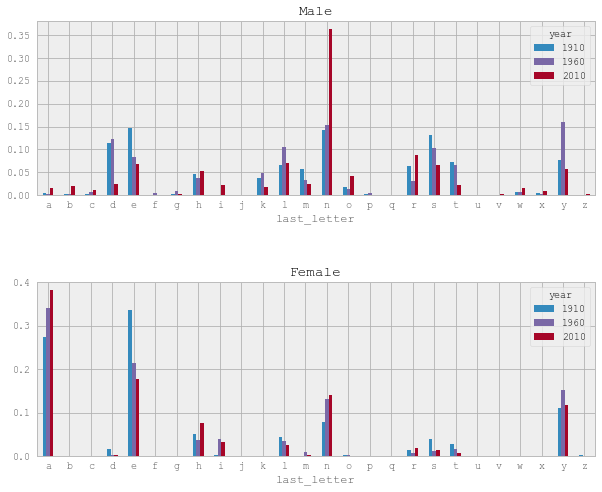

In [21]:
letter_prop=subtable/subtable.sum().astype(float)
fig, axes=plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [22]:
letter_prop=table/table.sum().astype(float)
dny_ts=letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


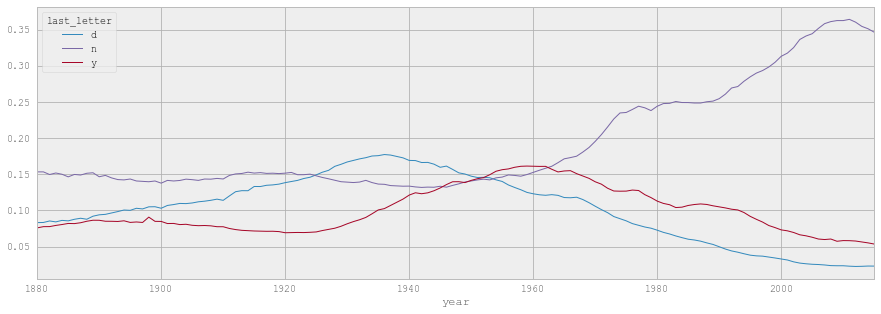

In [23]:
dny_ts.plot()

In [24]:
all_names=top1000.name.unique()
mask=np.array(['lesl' in x.lower() for x in all_names])
lesl_like=all_names[mask]
lesl_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [25]:
filtered=top1000[top1000.name.isin(lesl_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376034
Lesly      11431
Name: births, dtype: int64

In [26]:
table=filtered.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
table=table.div(table.sum(1), axis=0)
table.tail()

c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
c:\users\anand\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN


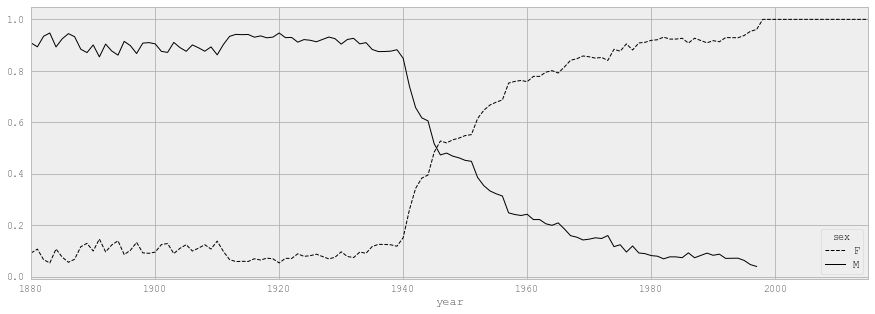

In [27]:
table.plot(style={'M':'k-', 'F':'k--'})